# Assignment 3 - Demosaicing

- Either of the MSR database or McMaster Dataset can be used for Demosaicing purpose.
- The concepts involved in demosaicing are:
    - The green color channel information is mostly available and can be used for interpolating to get entire green colour channel.
    - Then, bilateral or NLM filter can be applied.
    - To interpolate red and blue colour channels, first gaussian filter is applied to remove high frequency and then HFC (high frequency component) is added from the Green colour channel. **High frequency components are almost same in all the colur channels**

# Import Libraries

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

# Read and plot the image

- The image used is Dataset_LINEAR_without_noise/bayer_panasonic/input/225.png

In [109]:
img_input = cv2.imread('225_input.png', 0)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img_input.shape)
n = img_input.shape[0]
m = img_input.shape[1]

(132, 220)


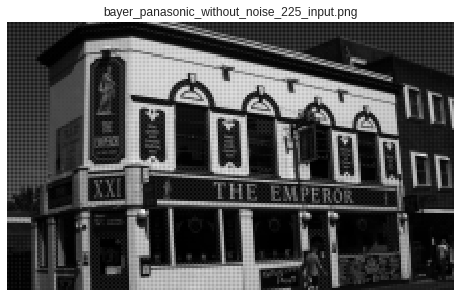

In [110]:
plt.imshow(img_input, cmap='gray'), plt.title('bayer_panasonic_without_noise_225_input.png')
plt.xticks([]), plt.yticks([])
plt.show()

(132, 220, 3)


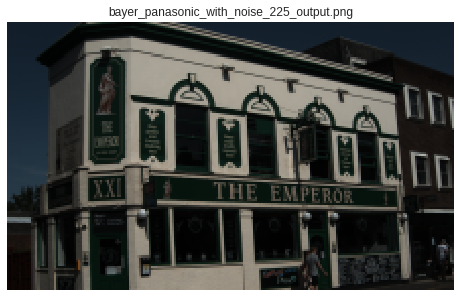

In [111]:
img_original = cv2.imread('225_output.png')
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

print(img_original.shape)
plt.imshow(img_original), plt.title('bayer_panasonic_with_noise_225_output.png')
plt.xticks([]), plt.yticks([])
plt.show()

# Extract color channels from the Bayer pattern, i.e. the input image

In [112]:
green_channel = np.asarray(img_input, dtype=np.float32)
green_channel[::2, ::2] = 0
green_channel[1::2, 1::2] = 0
print(green_channel)

[[ 0. 29.  0. ... 30.  0. 30.]
 [30.  0. 30. ...  0. 31.  0.]
 [ 0. 30.  0. ... 31.  0. 31.]
 ...
 [ 5.  0.  6. ...  0. 27.  0.]
 [ 0.  4.  0. ... 24.  0. 22.]
 [ 5.  0.  6. ...  0. 21.  0.]]


# Interpolate the green channel

In [0]:
for i in range(1, n - 1, 2):
    for j in range(1, m - 1, 2):
        green_channel[i, j] = (green_channel[i - 1, j] + green_channel[i, j - 1] + green_channel[i + 1, j] + green_channel[i, j + 1])/4
        

In [114]:
print(green_channel)

[[ 0.   29.    0.   ... 30.    0.   30.  ]
 [30.   29.75 30.   ... 30.5  31.    0.  ]
 [ 0.   30.    0.   ... 31.    0.   31.  ]
 ...
 [ 5.    4.75  6.   ... 26.   27.    0.  ]
 [ 0.    4.    0.   ... 24.    0.   22.  ]
 [ 5.    0.    6.   ...  0.   21.    0.  ]]


In [0]:
for i in range(2, n - 1, 2):
    for j in range(2, m - 1, 2):
        green_channel[i, j] = (green_channel[i - 1, j] + green_channel[i, j - 1] + green_channel[i + 1, j] + green_channel[i, j + 1])/4     

In [116]:
print(green_channel)

[[ 0.   29.    0.   ... 30.    0.   30.  ]
 [30.   29.75 30.   ... 30.5  31.    0.  ]
 [ 0.   30.   30.   ... 31.   31.   31.  ]
 ...
 [ 5.    4.75  6.   ... 26.   27.    0.  ]
 [ 0.    4.    5.5  ... 24.   23.5  22.  ]
 [ 5.    0.    6.   ...  0.   21.    0.  ]]


In [117]:
count = 0
for i in range(1, n):
    for j in range(1, m):
        if (green_channel[i, j] == 0):
            count = count + 1
print(count)

175
